# Overview
Ray Rracing is a technique for generating an image by tracing the path of light through pixels in an image plane and simulating the effects of its encounters with virtual objects.

The technique is capable of producing a very high degree of visual realism, usually higher than that of typical scanline rendering methods, but at a greater computational cost.

The objective of this exercise is to implement a ray casting/tracing engine. A ray tracer shoots rays from the observer’s eye through a screen and into a scene of objects. It calculates the ray’s intersection with the objects, finds the nearest intersection and calculates the color of the surface according to its material and lighting conditions. _(This is the way you should think about it –
this will help in your implementation)._

## Grading
- Pinhole Camera **7 points**
- Display geometric primitives in space:
  - Triangles **8 points**
  - Diamonds 15 points
  - Spheres 15 points
- Basic lighting
  - Ambient light **5 points**
  - Directional Light source **7 Points**
  - Spotlight **8 points**
  - Simple materials (ambient, diffuse, specular...) **10 points**
- Basic hard shadows **5 points**
- Reflecting surfaces **10 points**
- Create a scene of your own **10 points** with the instructions below – Be creative! Well thought-of scenes may get **<u>bonus points</u>** 😉
- Refracting surfaces **5 points <u>bonus</u>**

## Guidelines

- We provided you with some framework for you to work with - take adventage of the methods we implemented for you.
- While you do not have to implement everything using our suggested helper methods, we are expecting that all the methods that are used in this example notebook will be implemented, and this will also allow you to test your code.
- You may (and sometimes MUST) add parameters and arguments to methods and classes.
- You may change and even overwrite other helper_classes.py classes and functions. However, you may find it easier to use it instead of going against it.
- You are highly recommended to write a lot of helper functions in hw3. For example: Finding the closest object, Computing the color for a single light source, etc.
- You may **not** change:
     - base classes *LightSource* and *Object3D*
     - arguments for the *render_scene* and *your_own_scene* functions.
     - code written for you in this notebook.
- You don't need to restart the notebook for every change in your code - just run the code snippet below before you start running any code in the notebook.

## Tips & Guidelines

- All light sources and 3D objects have similar functions and arguments in order to make your life easier while rendering. It doesn't mean you need to use all the arguments in every situation
- There is a difference between how you treat every 3D Objects. You can differentiate of which class is each object with *isinstance()*
- With barycentric coordinates test, you may want to use some epsilon as we are working with float values.
- Using the exact intersection point may lead to bugs. After finding an intersection, choose a close point that is above the intersection point (Think - How can I shift a point "above" the surface? what is the direction?)
- When testing, use lower rendering resultion (say $64\times 64$) to save you time

# Scene Examples

We provided you with some ready scenes to validate your answers. The scenes are in an increasing implementation levels, so we recommend you to implement the code according to the scenes.

In [31]:
# This small code snippet will allow you to change your python file without resetting the kernel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Tip: for debuging, use lower resolution for faster rendering

# RENDER_RESOLUTION = (256,256)
# RENDER_RESOLUTION = (128,128)
RENDER_RESOLUTION = (64,64)

## Scene 1: Hello Ray Tracing!

In this scene we render two planes with different colors. You can test this scene to check if your camera and colors are working correctly.

![](scenes/scene1.png)

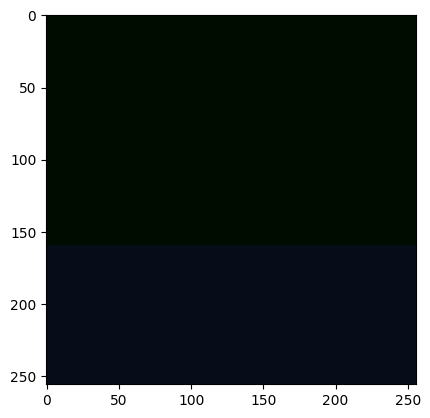

In [33]:
from hw3 import *

plane_a = Plane([0,1,0],[0,-1,0])
plane_a.set_material([0.3, 0.5, 1], [0.3, 0.5, 1], [1, 1, 1], 100, 0.5)
plane_b = Plane([0,0,1], [0,0,-3])
plane_b.set_material([0, 0.5, 0], [0, 1, 0], [1, 1, 1], 100, 0.5)


objects = [plane_a, plane_b]

light = PointLight(intensity= np.array([1, 1, 1]),position=np.array([1,1,1]),kc=0.1,kl=0.1,kq=0.1)

lights = [light]

ambient = np.array([0.1,0.1,0.1])

camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, RENDER_RESOLUTION, 1)
plt.imshow(im)
plt.imsave('scene1.png', im)

## Scene 2 - Triangles and Shadows

This scene adds a single triangle on the background of a plane. Because of its position, it will also cast shadow on the plane.
The lighting is Directional

![](scenes/scene2.png)

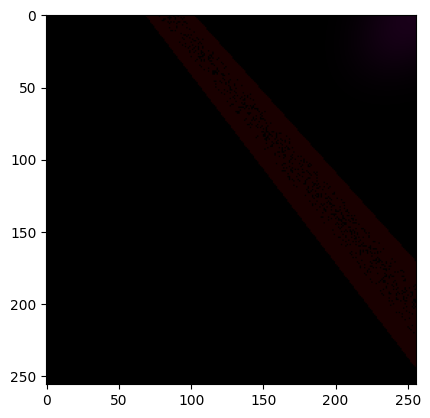

In [34]:
from hw3 import *
from helper_classes import *

v_list = np.array([[-1,0,-1],
                   [1,0,-1],
                   [0,1.5,-1.5]])

triangle = Triangle(*v_list)
triangle.set_material([1, 0, 0], [1, 0, 0], [0, 0, 0], 100, 0.5)

plane = Plane([0,0,1], [0,0,-4])
plane.set_material([0, 0.5, 0], [0, 1, 0], [.1, .1, .1], 100, 0.5)


objects = [triangle, plane]

light = DirectionalLight(intensity= np.array([1, 1, 1]), direction=np.array([1,1,1]))

lights = [light]

ambient = np.array([0.1,0.1,0.1])

camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, RENDER_RESOLUTION, 1)
plt.imshow(im)
plt.imsave('scene2.png', im)

## Scene 3 - Diamond with Reflections

This scene includes two planes (a background and a floor) and a diamond with light reflections on plane.

![](scenes/scene3.png)

In [35]:
from hw3 import *
from helper_classes import *

v_list = np.array(
[
    [-0.5, -0.142, -0.998],
    [-0.034, 0.092, -0.145],
    [0.484, 0.031, -0.998],
    [-0.104, 0.851, -0.828],
    [0.23, -0.833, -0.591]
])

diamond = Pyramid(v_list)
diamond.set_material([0.1, 0.4, 0.7], [0.1, 0.4, 0.7], [0.3, 0.3, 0.3], 10, 0.5)
diamond.apply_materials_to_triangles()

plane = Plane([0,1,0], [0,-1,0])
plane.set_material([0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [1, 1, 1], 1000, 0.5)
background = Plane([0,0,1], [0,0,-30])
background.set_material([1, 0.3, 0.3], [1, 0.3, 0.3], [0.2, 0.2, 0.2], 10, 0.5)


objects = [diamond, background, plane]

light = PointLight(intensity=np.array([1, 1, 1]), position=np.array([0,1,1]), kc=0.1, kl=0.1, kq=0.1)

lights = [light]

ambient = np.array([0.1,0.1,0.1])

camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, RENDER_RESOLUTION, 3)
plt.imshow(im)
plt.imsave('scene3.png', im)

TypeError: Triangle.__init__() missing 3 required positional arguments: 'a', 'b', and 'c'

## Scene 4 - Sphere with reflections

This scene has two spheres with different colors.

![](scenes/scene4.png)

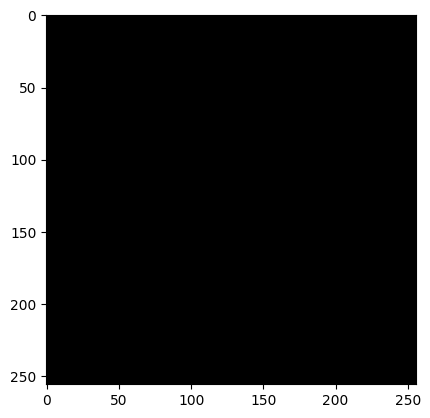

In [ ]:
from hw3 import *

sphere_a = Sphere([-0.5, 0.2, -1],0.5)
sphere_a.set_material([1, 0, 0], [1, 0, 0], [0.3, 0.3, 0.3], 100, 1)
sphere_b = Sphere([0.8, 0, -0.5],0.3)
sphere_b.set_material([0, 1, 0], [0, 1, 0], [0.3, 0.3, 0.3], 100, 0.2)
plane = Plane([0,1,0], [0,-0.3,0])
plane.set_material([0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [1, 1, 1], 1000, 0.5)
background = Plane([0,0,1], [0,0,-3])
background.set_material([0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [0.2, 0.2, 0.2], 1000, 0.5)


objects = [sphere_a,sphere_b,plane,background]

light = PointLight(intensity= np.array([1, 1, 1]),position=np.array([1,1.5,1]),kc=0.1,kl=0.1,kq=0.1)

lights = [light]

ambient = np.array([0.1,0.2,0.3])

camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, RENDER_RESOLUTION, 3)
plt.imshow(im)
plt.imsave('scene4.png', im)

## Scene 5 - Different Lighting
This scene has 3 light sources, each one in different color, and a white background.

![](scenes/scene5.png)

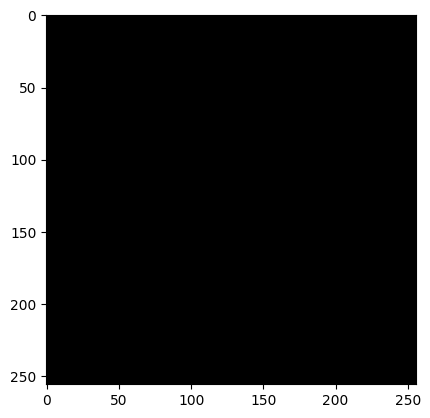

In [ ]:
from hw3 import *

background = Plane([0,0,1], [0,0,-1])
background.set_material([1, 1, 1], [1, 1, 1], [1, 1, 1], 1000, 0.5)


objects = [background]

light_a = SpotLight(intensity= np.array([0, 0, 1]),position=np.array([0.5,0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)
light_b = SpotLight(intensity= np.array([0, 1, 0]),position=np.array([-0.5,0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)
light_c = SpotLight(intensity= np.array([1, 0, 0]),position=np.array([0,-0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)

lights = [light_a,light_b,light_c]

ambient = np.array([0,0,0])

camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, RENDER_RESOLUTION, 3)
plt.imshow(im)
plt.imsave('scene5.png', im)

## Scene 6 - Your own scene!

This is your chance to be creative - create an interesting scene!

Your scene has to have:
- At least 2 different light sources
- Plane + At least 2 different 3D Objects

Well thought-of scenes may reward bonus points!

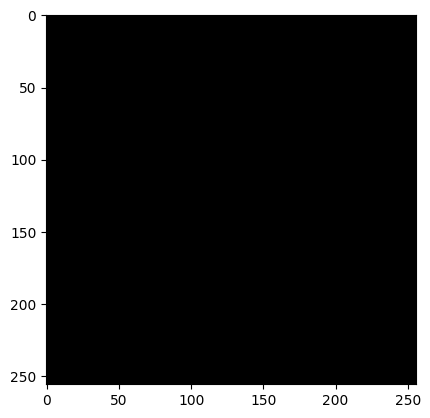

In [ ]:
from hw3 import *

ambient = np.array([0,0,0])
camera, lights, objects = your_own_scene()

im = render_scene(camera, lights, ambient, objects, RENDER_RESOLUTION, 3)
plt.imshow(im)
plt.imsave('scene6.png', im)

## Bonus Points

### Refraction

Look into Snell’s law: http://en.wikipedia.org/wiki/Snell's_law
Refractive index table: http://en.wikipedia.org/wiki/List_of_refractive_indices